In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv (r'C:\Users\Michael\Downloads\insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

State your Null Hypothesis and Alternative Hypothesis
Null: They do not have higher charges
Alt: Smokers get charged more
I have decided to pick the alt

In [3]:
smoker = df.loc[ df['smoker'] == 'yes'].copy()
non = df.loc[ df['smoker'] == 'no'].copy()

In [4]:
data = smoker['charges']
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [5]:
low_end = 20000
high_end = max

In [6]:
x_range = np.linspace(min, max, 1000)

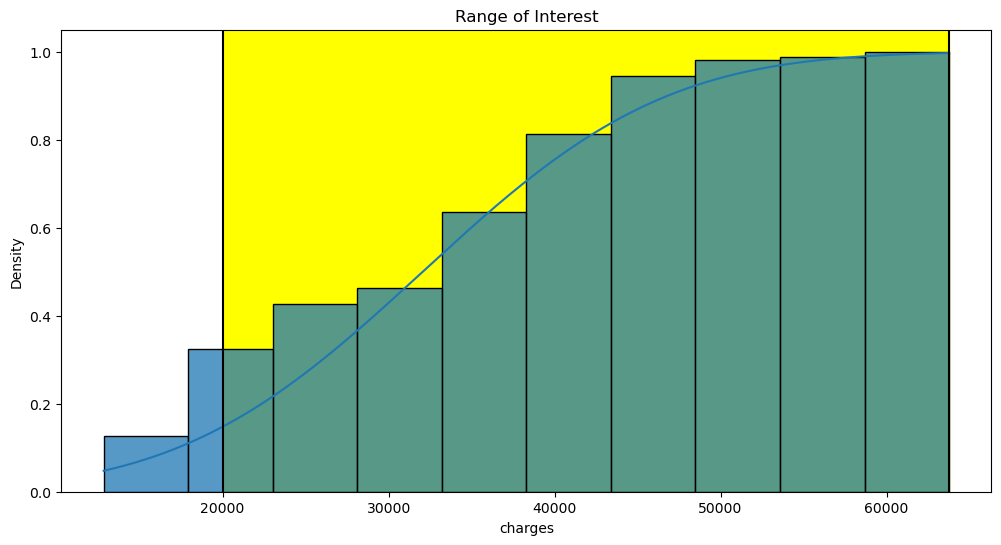

In [7]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [8]:
1-stats.norm.cdf(low_end, loc=np.mean(data), scale= np.std(data))

0.8522159501946762

There is a probability of 0.85 that smokers get charged at a higher rate

In [9]:
result = stats.normaltest(data)
print(result)
result.pvalue < .05

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

In [10]:
zscores_f = stats.zscore(smoker['charges'])
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [11]:
zscores_m = stats.zscore(non['charges'])
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)

24

In [12]:
result_m = stats.normaltest(smoker['charges'])
result_m

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [13]:
result_f = stats.normaltest(non['charges'])
result_f

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

 the p-value is greater than 0.05 so we can assume these are normal distributions.

In [14]:
result = stats.levene(non['charges'], smoker['charges'])
result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

Test

In [15]:
result = stats.ttest_ind(non['charges'],smoker['charges'])
result

Ttest_indResult(statistic=-46.66492117272371, pvalue=8.271435842179102e-283)

Since our P value is greater than 0.05 we will reject the alt hypothesis

# Q2. Are men more likely to smoke than women?
- Null they are both equally likely to smoke
- Alt one gender is more likely to smoke

In [19]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [20]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [21]:
print(p)
p<.05

0.006548143503580696


True

Since P is less than 0.05 we reject the null hypothesis 

# Q3. Do different regions have different charges, on average?
- Null there is no difference
- Alt some regions have different charges

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
groups = {}
for i in df['region'].unique():
    data = df.loc[df['region']==i,'charges'].copy()
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [26]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [27]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [28]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [29]:
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

Since the P value is less than 0.05 we can reject the null

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
values = df['charges']
labels = df['region']

In [32]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True
